# Figures with Dynamics

This notebook is intended to provide figures relating to the *dynamics* of the models we are discussing. Figures related to *inference* are handled in separate notebooks for each data set. 

In [3]:
import numpy as np
from numba import jit

from py.model import *
from py.scores import *

import pandas as pd
# from SpringRank import SpringRank

from matplotlib import pyplot as plt

import matplotlib
matplotlib.rcParams['font.sans-serif'] = "Arial Unicode MS"

# Biased SpringRank??

In [34]:
def RW_matrix(A, p = 0.5, alpha = 0):
    wins = A.T
    losses = A
    D_wins = np.diag(wins.sum(axis = 1))
    D_losses = np.diag(losses.sum(axis = 1))
    M = p*(wins - D_losses) + (1-p)*(losses - D_wins) + alpha*np.eye(A.shape[0])
    return(M)

In [100]:
n = 10
def rate_matrix(s, beta):
    gam = np.exp(beta*s)
    gam = gam / gam.sum()
    G = np.tile(gam, (len(gam), 1))
    return(G)

s = np.random.rand(n)

for i in range(1000):

    G = rate_matrix(s, beta = 20)
    M = RW_matrix(G, p = .6)
    eigs = np.linalg.eig(M)
    which_eig = np.argmin(np.abs(eigs[0]))
    val = eigs[0][which_eig]
    s = eigs[1][:,which_eig]
    s = np.abs(s)
    if i % 100 == 0:
        print(s)

[0.27856727 0.30143774 0.36390124 0.2721736  0.43496318 0.32666006
 0.27217359 0.29253942 0.2721771  0.30886092]
[0.30193717 0.30193717 0.30193726 0.30193717 0.42368086 0.30193717
 0.30193717 0.30193717 0.30193717 0.30193717]
[0.30193718 0.30193718 0.30193718 0.30193718 0.42368086 0.30193718
 0.30193718 0.30193718 0.30193718 0.30193718]
[0.30193718 0.30193718 0.30193718 0.30193718 0.42368086 0.30193718
 0.30193718 0.30193718 0.30193718 0.30193718]
[0.30193718 0.30193718 0.30193718 0.30193718 0.42368086 0.30193718
 0.30193718 0.30193718 0.30193718 0.30193718]
[0.30193718 0.30193718 0.30193718 0.30193718 0.42368086 0.30193718
 0.30193718 0.30193718 0.30193718 0.30193718]
[0.30193718 0.30193718 0.30193718 0.30193718 0.42368086 0.30193718
 0.30193718 0.30193718 0.30193718 0.30193718]
[0.30193718 0.30193718 0.30193718 0.30193718 0.42368086 0.30193718
 0.30193718 0.30193718 0.30193718 0.30193718]
[0.30193718 0.30193718 0.30193718 0.30193718 0.42368086 0.30193718
 0.30193718 0.30193718 0.3019

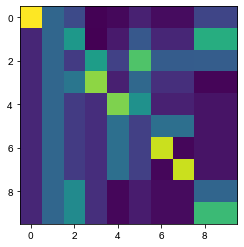

In [67]:
G = rate_matrix(s, beta = 0)
M = RW_matrix(G)
plt.imshow(np.abs(np.linalg.eig(M)[1]))

In [27]:
s

array([0.983359  , 0.06055767, 0.06055767, 0.06055767, 0.06055767,
       0.06055767, 0.06055767, 0.06055767, 0.06055767, 0.06055767])

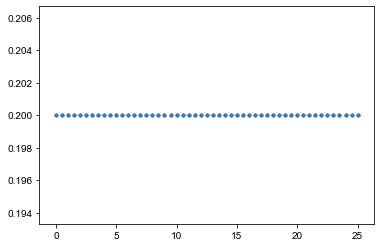

In [18]:
for i in range(V.shape[1]):
    p = plt.scatter(BETAS, V[:,i], color = cset[0], alpha = 1, s=7)

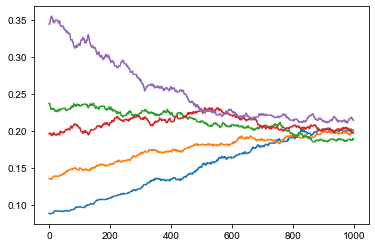

In [55]:
n = 5

A0 = np.random.rand(n,n)
A0 = A0/A0.sum()
M = model()

M.set_score(score_function = lambda A: RW_score(A.T, p = .99, alpha = 10**(-8)))
M.set_features([linear_feature])

T = M.simulate(beta = np.array([3]), 
                       lam = .999, 
                       A0 = A0, 
                       n_rounds = 1000, 
                       update = stochastic_update, 
                       m_updates = m_updates)
GAMMA = M.get_rates()
plt.plot(GAMMA.mean(axis = 1))

In [26]:
M = np.eye(n) - n**(-1)*np.ones((n,n))
M.dot(M)

array([[ 0.8, -0.2, -0.2, -0.2, -0.2],
       [-0.2,  0.8, -0.2, -0.2, -0.2],
       [-0.2, -0.2,  0.8, -0.2, -0.2],
       [-0.2, -0.2, -0.2,  0.8, -0.2],
       [-0.2, -0.2, -0.2, -0.2,  0.8]])

In [125]:
n = 4
# A = np.random.randint(10, size = (n,n))
A = np.random.rand(n,n)

wins = A.T
losses = A

In [126]:
p = .9
alpha = .0000001
D_wins = np.diag(wins.sum(axis = 1))
D_losses = np.diag(losses.sum(axis = 1))
M = (1/2)*(losses + wins) + ((2*p-1)/2)*(wins - losses)
np.fill_diagonal(M, -p*D_losses - (1-p)*D_wins)

M = p*(wins - D_losses) + (1-p)*(losses - D_wins) + alpha*np.eye(A.shape[0])

In [127]:
np.linalg.eig(M)

(array([ 9.99999998e-08+0.j        , -2.18003444e+00+0.j        ,
        -2.29406838e+00+0.52991568j, -2.29406838e+00-0.52991568j]),
 array([[ 0.58313723+0.j        ,  0.66169407+0.j        ,
         -0.18000684-0.05243737j, -0.18000684+0.05243737j],
        [ 0.54372998+0.j        ,  0.0964685 +0.j        ,
          0.36563973+0.42835473j,  0.36563973-0.42835473j],
        [ 0.44324584+0.j        , -0.01476717+0.j        ,
          0.40171568-0.37591736j,  0.40171568+0.37591736j],
        [ 0.409685  +0.j        , -0.7433954 +0.j        ,
         -0.58734856+0.j        , -0.58734856-0.j        ]]))

(array([ 1.00000000e-03+0.j       , -2.46569535e+00+0.3699463j,
        -2.46569535e+00-0.3699463j, -2.03319667e+00+0.j       ]),
 array([[ 0.38325459+0.j        ,  0.09245495-0.37408907j,
          0.09245495+0.37408907j,  0.047655  +0.j        ],
        [ 0.42543836+0.j        , -0.71643071+0.j        ,
         -0.71643071-0.j        ,  0.69521051+0.j        ],
        [ 0.57523928+0.j        ,  0.20496899+0.34623971j,
          0.20496899-0.34623971j, -0.7167491 +0.j        ],
        [ 0.58413859+0.j        ,  0.41900677+0.02784937j,
          0.41900677-0.02784937j, -0.02611641+0.j        ]]))

# Katz??

In [52]:
cset = ['#4477AA', '#EE6677', '#228833', '#CCBB44', '#66CCEE', '#AA3377']
cset_muted = ['#CC6677', '#332288', '#DDCC77', '#117733', '#88CCEE', '#882255', '#44AA99', '#999933', '#AA4499', '#DDDDDD','#000000']

@jit(nopython=True)
def linear_feature(s):
    return(np.outer(np.ones(len(s)), s))

n = 8

# A0 = np.random.rand(n,n)
# A0 = A0/A0.sum()

A0 = np.ones((n,n))
A0[0,1] += 10000000
A0[6,7] += 10000000
A0 = A0/A0.sum()

lam = .98
n_rounds = 2000

m_updates = 1

b_grid = 51

BETAS = np.linspace(0,n, b_grid)

V = np.zeros((b_grid, n))

M = model()
M.set_score(score_function = lambda A: katz_score(A.T, alpha = 1))
M.set_features([linear_feature])

for j in range(b_grid):

    M.simulate(beta = np.array([BETAS[j]]), 
                       lam = lam, 
                       A0 = A0, 
                       n_rounds = n_rounds, 
                       update = deterministic_update, 
                       m_updates = m_updates)
    GAMMA = M.get_rates()
    GAMMA = np.sort(GAMMA, axis = 2)
    V[j] = GAMMA[(-1000):(-1)].mean(axis = (0,1))

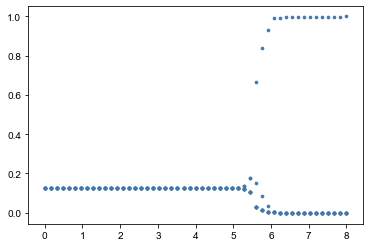

In [53]:
for i in range(V.shape[1]):
    p = plt.scatter(BETAS, V[:,i], color = cset[0], alpha = 1, s=7)

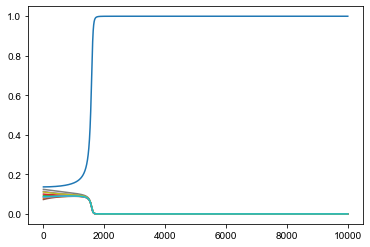

In [273]:
A0 = np.random.rand(n,n)
A0 = A0/A0.sum()


T = M.simulate(beta = np.array([17]), 
                       lam = .99, 
                       A0 = A0, 
                       n_rounds = 10000, 
                       update = deterministic_update, 
                       m_updates = m_updates)
GAMMA = M.get_rates()
plt.plot(GAMMA.mean(axis = 1))

In [245]:
T = M.simulate(beta = np.array([18]), 
                       lam = .99, 
                       A0 = A0, 
                       n_rounds = 2000, 
                       update = deterministic_update, 
                       m_updates = m_updates)

In [246]:
dA = M.get_states()[-1] - M.get_rates()[-1]

np.linalg.solve(dA, b = np.zeros(n))

LinAlgError: Singular matrix

# Setup: 

In [2]:
cset = ['#4477AA', '#EE6677', '#228833', '#CCBB44', '#66CCEE', '#AA3377']
cset_muted = ['#CC6677', '#332288', '#DDCC77', '#117733', '#88CCEE', '#882255', '#44AA99', '#999933', '#AA4499', '#DDDDDD','#000000']

In [3]:
@jit(nopython=True)
def linear_feature(s):
    return(np.outer(np.ones(len(s)), s))

In [4]:
preds = pd.read_csv('numerics/data_n_10.csv')

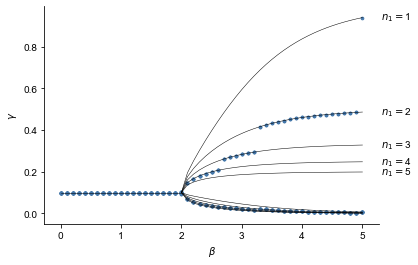

In [8]:
fig = plt.figure()
ax = fig.add_subplot()

for n1 in np.arange(1,6):
    sub = preds[preds.n1 == n1]
    sub = sub[sub.beta <= 5]
    v1 = sub.s1
    v2 = sub.s2
    n1 = sub.n1
    n2 = sub.n2
    v1 = np.exp(sub.beta*sub.s1)
    v2 = np.exp(sub.beta*sub.s2)
    gamma_1 = np.array(v1/(n1*v1 + n2*v2))
    gamma_2 = np.array(v2/(n1*v1 + n2*v2))
    ax.plot(sub.beta, gamma_1 , color = 'black', linewidth = .5)
    ax.plot(sub.beta, gamma_2 , color = 'black', linewidth = .5)
    ax.text(np.array(sub.beta).max()+.3, gamma_1[-1]-.01, s = r'$n_1 = $' + str(n1.max()))

ax.plot([0,2], [.1,.1], color = 'black', linewidth = .5)    

n = 10

A0 = np.random.rand(n,n)
A0 = A0/A0.sum()

lam = .8
n_rounds = 5000

m_updates = 1

b_grid = 51

b_grid = 51
BETAS = np.linspace(0,5, b_grid)

V = np.zeros((b_grid, n))

M = model()
M.set_score(score_function = lambda A: homebrew_SpringRank_score(A.T))
M.set_features([linear_feature])

for j in range(b_grid):

    M.simulate(beta = np.array([BETAS[j]]), 
                       lam = lam, 
                       A0 = A0, 
                       n_rounds = n_rounds, 
                       update = deterministic_update, 
                       m_updates = m_updates)
    GAMMA = M.get_rates()
    GAMMA = np.sort(GAMMA, axis = 2)
    V[j] = GAMMA[(-1000):(-1)].mean(axis = (0,1))

for i in range(V.shape[1]):
    p = ax.scatter(BETAS, V[:,i], color = cset[0], alpha = 1, s=7)
    
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set(xlabel = r'$\beta$')
ax.set(ylabel = r'$\gamma$')

plt.savefig('fig/springRank_with_curves.png', dpi = 300, bbox_inches = 'tight')

# Detailed bifurcations: SpringRank

In [14]:
n = 5

A0 = np.random.rand(n,n)
A0 = A0/A0.sum()

lam = .9995
n_rounds = 50000

m_updates = 1

b_grid = 51
BETAS = np.linspace(1,3, b_grid)

V = np.zeros((b_grid, n))

M = model()
M.set_score(score_function = lambda A: homebrew_SpringRank_score(A.T))
M.set_features([linear_feature])

for j in range(b_grid):

    M.simulate(beta = np.array([BETAS[j]]), 
                       lam = lam, 
                       A0 = A0, 
                       n_rounds = n_rounds, 
                       update = stochastic_update, 
                       m_updates = m_updates)
    GAMMA = M.get_rates()
    GAMMA = np.sort(GAMMA, axis = 2)
    V[j] = GAMMA[(-5000):(-1)].mean(axis = (0,1))

[Text(0, 0.5, '$\\gamma$')]

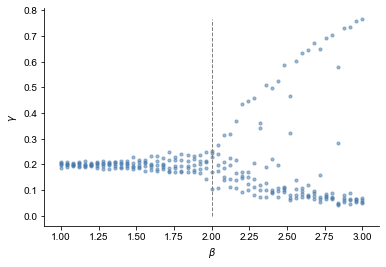

In [19]:
fig = plt.figure()
ax = fig.add_subplot(111)

for i in range(V.shape[1]):
    p = ax.scatter(BETAS, V[:,i], color = cset[0], alpha = 0.5, s=10)

ax.vlines(x = 2, ymin = 0, ymax = V.max(), linestyle = 'dashed', linewidth = 1, color = 'grey')    

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set(xlabel = r'$\beta$')
ax.set(ylabel = r'$\gamma$')

# plt.savefig('fig/SR_bifurcation_detail.png', bbox_inches = 'tight')

# Comparison of Bifurcations with alternate score functions

In [21]:
# Params

A = np.sqrt(np.random.rand(n,n))
A0 = A/A.sum()
lam = .995

In [22]:
scores = {
    'SpringRank': lambda A: homebrew_SpringRank_score(A.T),
    'Root-Degree' : lambda A: powered_degree_score(A, 1/2), 
    'Fiedler Vector' : lambda A: -fiedler_vector_score(A)
}

transition_predictions = {
    'SpringRank': 2, 
    'Root-Degree': 2*n**(1/2),
    'Fiedler Vector': 0
}

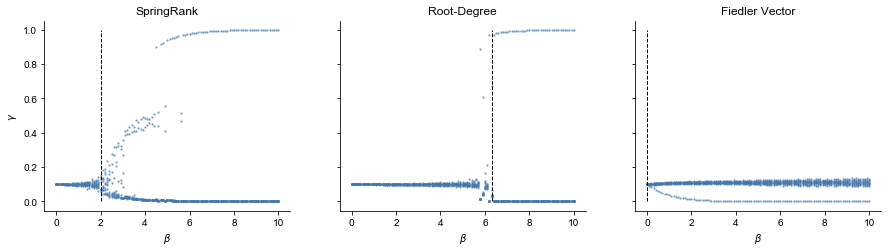

In [23]:
b_grid = 101

n_rounds = 50000

n = 10
A0 = np.random.rand(n,n)
A0 = A0/A0.sum()

BETAS = {
    'SpringRank' : np.linspace(0, 10, b_grid), 
    'Root-Degree': np.linspace(0,10, b_grid),
    'Fiedler Vector' : np.linspace(0,10,b_grid),
}

lam = .9995

score_names = ['SpringRank','Root-Degree', 'Fiedler Vector']

k = len(score_names)

fig, axarr = plt.subplots(1,k, figsize = (15, 3.5), sharey = True)

for i in range(k):
    
    M = model()
    M.set_score(score_function = scores[score_names[i]])
    M.set_features([linear_feature])
    
    V = np.zeros((b_grid, n))
    
    for j in range(b_grid):
        M.simulate(beta = np.array([BETAS[score_names[i]][j]]), 
                   lam = lam, 
                   A0 = A0, 
                   n_rounds = n_rounds, 
                   update = stochastic_update, 
                   m_updates = m_updates)
        GAMMA = M.get_rates()
        GAMMA = np.sort(GAMMA, axis = 2)
        V[j] = GAMMA[(-5000):(-1)].mean(axis = (0,1))
    
    if k == 1:
        ax = axarr
    else:
        ax = axarr[i]
    
    for j in range(V.shape[1]):
        p = ax.scatter(BETAS[score_names[i]], V[:,j], color = cset[0], alpha = 0.5, s=2)

#     p = ax.plot(BETAS[score_names[i]], V, color = 'grey', alpha = .5)
    
    v = ax.vlines(x = [transition_predictions[score_names[i]]], 
                        ymin = 0, 
                        ymax = 1, 
                        linewidth = 1, 
                        linestyle = 'dashed')
    
    t = ax.set_title(score_names[i])
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    ax.set(xlabel = r'$\beta$')
    
    if i == 0:
        ax.set(ylabel = r'$\gamma$')
    
plt.savefig('fig/phase_transitions_stochastic.png', bbox_inches = 'tight', dpi = 300)

# Comparison: Impact of quadratic features

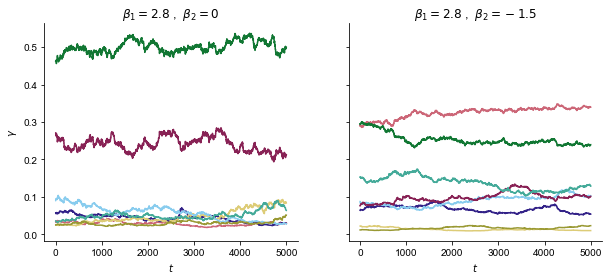

In [73]:
def quadratic_feature(s):
    S = linear_feature(s)
    V = (S - S.T)**2
    return(V)

lam = .998
n_rounds = 10000
m_updates = 1

n = 8
A0 = np.random.rand(n,n)
A0 = A0/A0.sum()


fig, axarr = plt.subplots(1,2, figsize = (10, 4), sharey = True)

M = model()
M.set_score(score_function = lambda A: homebrew_SpringRank_score(A.T))
M.set_features([linear_feature, 
                quadratic_feature])

M.simulate(beta = np.array([2.8, 0]), 
           lam = lam, 
           A0 = A0, 
           n_rounds = n_rounds, 
           update = stochastic_update, 
           m_updates = m_updates)
GAMMA = M.get_rates()

for j in range(n):
    p = axarr[0].plot(GAMMA.mean(axis = 1)[5000:,j], color = cset_muted[j])

M.simulate(beta = np.array([2.8, -1.5]), 
           lam = lam, 
           A0 = A0, 
           n_rounds = n_rounds, 
           update = stochastic_update, 
           m_updates = m_updates)
GAMMA = M.get_rates()
for j in range(n):
    p = axarr[1].plot(GAMMA.mean(axis = 1)[5000:,j], color = cset_muted[j])


for ax in axarr:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set(xlabel = r'$t$')
    
axarr[0].set(ylabel = r'$\gamma$')
axarr[0].set_title(r'$\beta_1 = 2.8\;$, $\;\beta_2 = 0$')
axarr[1].set_title(r'$\beta_1 = 2.8\;$, $\;\beta_2 = -1.5$')

plt.savefig('fig/SR_linear_and_quadratic.png', bbox_inches = 'tight', dpi = 300)